In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('../../scripts/')
import manage_files as mf
import average_correl_functions as acf

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
#experimental data, modify the adresses
T1_hMff_experiment=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_T1_experiment.dat")
T2_hMff_experiment=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_T2_experiment.dat")
NOE_hMff_experiment=np.loadtxt("../../experimental_relaxation_data/hMff_DSDS_hetnoe_experiment.dat")

In [3]:
output_path_relax="../../relax_times_yamls/protein/raw_data/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../timescales_yamls/protein/raw_data/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)
acf.set_biggest_ts_to_zero(timescales_yamls)

Spin relaxation data exist for:

   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_23500water_replica1
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_73800water_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_N

{'mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica5': {'analysis0': {'info': {'00_nuclei': '15N',
    '01_magnetic_field_[T]': 19.964291496497925,
    '02_magnetic_field_[MHz]': 850.0,
    '03_N_exp_to_fit': 100,
    '04_smallest_corr_time_[s]': 1e-12,
    '05_biggest_corr_time_[s]': 1e-07,
    '06_analyze': 0.02,
    '07_OP': 0,
    '08_corr_func_length_[ps]': 1500000.0,
    '09_saving_frequency_[ps]': 10.0,
    '10_xtc': 'non-Water_mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica5.xtc',
    '11_xtc_modified': '2023-06-16 13:28:42',
    '12_naame': 'mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica5'},
   'results': {'Coeff': {0: [0.0,
      0.0,
      0.0,
      0.0,
      0.011192951955935686,
      0.09336476704678567,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.030573337697253997,
      0.0,
      0.0,
      0.0,
      0.0,
   

In [4]:
peptides={"hMff_micelle_50SDS":"OPC_rep","hMff_m":23500,"hMff_mi":73800}
replicas=["replica1","replica2","replica3"]
T1={}
T2={}
NOE={}

for peptide in peptides:
    T1[peptide]={}
    T2[peptide]={}
    NOE[peptide]={}

for key in relaxation_yamls:
    for peptide in peptides:
        if peptide in key and str(peptides[peptide]) in key:
            
            for replica in replicas:
                if replica in key:
                    T1[peptide][replica]=[]
                    T2[peptide][replica]=[]
                    NOE[peptide][replica]=[]
                    
                    for analysis in relaxation_yamls[key]:
                        if (relaxation_yamls[key][analysis]["info"]["00_nuclei"]=="15N"
                           and relaxation_yamls[key][analysis]["info"]['02_magnetic_field_[MHz]']== 850.0
                           and relaxation_yamls[key][analysis]["info"]['03_N_exp_to_fit'] == 100
                           and relaxation_yamls[key][analysis]["info"]['04_smallest_corr_time_[s]']== 1e-12
                           and relaxation_yamls[key][analysis]["info"]['05_biggest_corr_time_[s]']== 1e-07
                           and relaxation_yamls[key][analysis]["info"]['06_analyze'] == 0.02):
                            
                            
                            if len(T1[peptide][replica])==0:
                                for pe in relaxation_yamls[key][analysis]["results"]:
                                    T1[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["T1"])
                                    T2[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["T2"])
                                    NOE[peptide][replica].append(relaxation_yamls[key][analysis]["results"][pe]["hetNOE"])
          

                
#peptides={"hMff_micelle_50SDS":"OPC_rep","hMff_m":23500,"hMff_mi":73800}         

for peptide in peptides:
    print(peptide)
    apT1=[]
    apT2=[]
    apNOE=[]
    for j,replica in enumerate(T1[peptide]):
        apT1.append(T1[peptide][replica])
        apT2.append(T2[peptide][replica])
        apNOE.append(NOE[peptide][replica])
    
    
    T1[peptide]["aver"]=0
    T2[peptide]["aver"]=0
    NOE[peptide]["aver"]=0
    
    for k in range(j+1):
        T1[peptide]["aver"]+=(np.array(apT1[k]))/(j+1)
        T2[peptide]["aver"]+=(np.array(apT2[k]))/(j+1)
        NOE[peptide]["aver"]+=(np.array(apNOE[k]))/(j+1)
    
    T1[peptide]["error"]=[np.std([apT1[0][i],apT1[1][i],apT1[2][i]])/np.sqrt(3) for i in range(len(apT1[0]))]
    T2[peptide]["error"]=[np.std([apT2[0][i],apT2[1][i],apT2[2][i]])/np.sqrt(3) for i in range(len(apT2[0]))]
    NOE[peptide]["error"]=[np.std([apNOE[0][i],apNOE[1][i],apNOE[2][i]])/np.sqrt(3) for i in range(len(apNOE[0]))]
      




hMff_micelle_50SDS
hMff_m
hMff_mi


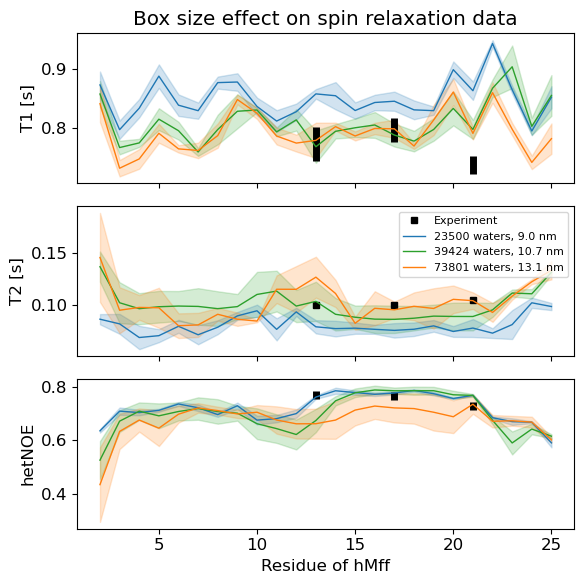

In [5]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)

ax1.set_ylabel("T1 [s]")
    
ax2.set_ylabel("T2 [s]")

ax3.set_ylabel("hetNOE")
ax3.set_xlabel("Residue of hMff")
ax1.set_title("Box size effect on spin relaxation data")
max_T1=0
max_T2=0
max_noe=0
min_noe=0
col=["blue","orange","green","red","purple","brown","ping","gray","olive","cyan"]
col=["C0","C1","C2","C3","C4","C5","C6","C7"]
colors=[]


#experimental data including the error bars, inported above
ax1.errorbar(T1_hMff_experiment[:,0],T1_hMff_experiment[:,2],T1_hMff_experiment[:,3],None,"none",color="black",markersize=1,linewidth=5)
ax2.errorbar(T2_hMff_experiment[:,0],T2_hMff_experiment[:,2],T2_hMff_experiment[:,3],None,"none",color="black",markersize=1,linewidth=5)
ax3.errorbar(NOE_hMff_experiment[:,0],NOE_hMff_experiment[:,2],NOE_hMff_experiment[:,3],None,"none",color="black",markersize=1,linewidth=5)


#simulation data, not inported, you have to get them 

#the lines

ax2.plot(T2_hMff_experiment[:,0],T2_hMff_experiment[:,2],"s",c="black",label="Experiment",markersize="4")


ax1.plot(np.linspace(2,25,24),T1['hMff_m']["aver"],"-",linewidth=1,color="C0")
ax2.plot(np.linspace(2,25,24),T2['hMff_m']["aver"],"-",linewidth=1,color="C0", label="23500 waters, 9.0 nm")
ax3.plot(np.linspace(2,25,24),NOE['hMff_m']["aver"],"-",linewidth=1,color="C0")


ax1.plot(np.linspace(2,25,24),T1['hMff_micelle_50SDS']["aver"],"-",linewidth=1,color="C2")
ax2.plot(np.linspace(2,25,24),T2['hMff_micelle_50SDS']["aver"],"-",linewidth=1,color="C2", label="39424 waters, 10.7 nm")
ax3.plot(np.linspace(2,25,24),NOE['hMff_micelle_50SDS']["aver"],"-",linewidth=1,color="C2")

ax1.plot(np.linspace(2,25,24),T1['hMff_mi']["aver"],"-",linewidth=1,color="C1")
ax2.plot(np.linspace(2,25,24),T2['hMff_mi']["aver"],"-",linewidth=1,color="C1", label="73801 waters, 13.1 nm")
ax3.plot(np.linspace(2,25,24),NOE['hMff_mi']["aver"],"-",linewidth=1,color="C1")



#the error bas shades
ax1.fill_between(np.linspace(2,25,24),np.array(T1['hMff_micelle_50SDS']["aver"])-np.array(T1['hMff_micelle_50SDS']["error"]), np.array(T1['hMff_micelle_50SDS']["aver"])+np.array(T1['hMff_micelle_50SDS']["error"]),alpha=0.2,color="C2")
ax2.fill_between(np.linspace(2,25,24),np.array(T2['hMff_micelle_50SDS']["aver"])-np.array(T2['hMff_micelle_50SDS']["error"]), np.array(T2['hMff_micelle_50SDS']["aver"])+np.array(T2['hMff_micelle_50SDS']["error"]),alpha=0.2,color="C2")
ax3.fill_between(np.linspace(2,25,24),np.array(NOE['hMff_micelle_50SDS']["aver"])-np.array(NOE['hMff_micelle_50SDS']["error"]), np.array(NOE['hMff_micelle_50SDS']["aver"])+np.array(NOE['hMff_micelle_50SDS']["error"]),alpha=0.2,color="C2")



ax1.fill_between(np.linspace(2,25,24),np.array(T1['hMff_m']["aver"])-np.array(T1['hMff_m']["error"]), np.array(T1['hMff_m']["aver"])+np.array(T1['hMff_m']["error"]),alpha=0.2,color="C0")
ax2.fill_between(np.linspace(2,25,24),np.array(T2['hMff_m']["aver"])-np.array(T2['hMff_m']["error"]), np.array(T2['hMff_m']["aver"])+np.array(T2['hMff_m']["error"]),alpha=0.2,color="C0")
ax3.fill_between(np.linspace(2,25,24),np.array(NOE['hMff_m']["aver"])-np.array(NOE['hMff_m']["error"]), np.array(NOE['hMff_m']["aver"])+np.array(NOE['hMff_m']["error"]),alpha=0.2,color="C0")


ax1.fill_between(np.linspace(2,25,24),np.array(T1['hMff_mi']["aver"])-np.array(T1['hMff_mi']["error"]), np.array(T1['hMff_mi']["aver"])+np.array(T1['hMff_mi']["error"]),alpha=0.2,color="C1")
ax2.fill_between(np.linspace(2,25,24),np.array(T2['hMff_mi']["aver"])-np.array(T2['hMff_mi']["error"]), np.array(T2['hMff_mi']["aver"])+np.array(T2['hMff_mi']["error"]),alpha=0.2,color="C1")
ax3.fill_between(np.linspace(2,25,24),np.array(NOE['hMff_mi']["aver"])-np.array(NOE['hMff_mi']["error"]), np.array(NOE['hMff_mi']["aver"])+np.array(NOE['hMff_mi']["error"]),alpha=0.2,color="C1")


ax2.legend(loc=1,prop={'size': 8})

plt.savefig("smaller_box2.pdf")

In [6]:
peptides={"hMff_m":'hMff_SDS_micelle_50SDS_23500waters',"hMff_micelle_50SDS":'hMff_SDS_micelle_50SDS_39420waters',"hMff_mi":'hMff_SDS_micelle_50SDS_73800waters'}    
for peptide,name in peptides.items():
    save_T1=[np.linspace(2,25,24),T1[peptide]['aver'],T1[peptide]['error']]
    np.savetxt(f'exported_simulation_data/T1_{name}.dat',np.transpose(save_T1),header=f'T1 data for {name} \n Residue, T1 [s], error [s]')
    
    save_T2=[np.linspace(2,25,24),T2[peptide]['aver'],T2[peptide]['error']]
    np.savetxt(f'exported_simulation_data/T2_{name}.dat',np.transpose(save_T2),header=f'T2 data for {name} \n Residue, T2 [s], error [s]')
    
    save_NOE=[np.linspace(2,25,24),NOE[peptide]['aver'],NOE[peptide]['error']]
    np.savetxt(f'exported_simulation_data/hetNOE_{name}.dat',np.transpose(save_NOE),header=f'hetNOE data for {name} \n Residue, hetNOE, error')